In [29]:
# from pyspark.sql import SparkSession
# import pyspark.pandas as ps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# spark = (
#     SparkSession.builder.appName("BNPL")
#     .config("spark.sql.repl.eagerEval.enabled", True) 
#     .config("spark.sql.parquet.cacheMetadata", "true")
#     .config("spark.driver.memory", "8g")
#     .getOrCreate()
# )

data_directory = "../data/"
tables_directory = data_directory + "tables/"
merchant_fraud_directory = tables_directory + "merchant_fraud_probability.csv"
consumer_fraud_directory = tables_directory + "consumer_fraud_probability.csv"
transactions_directory = "../data/curated/transactions.parquet"

In [3]:
transactions = pd.read_parquet(transactions_directory)
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13171143 entries, 0 to 13614674
Data columns (total 21 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   user_id                        int64         
 1   merchant_abn                   int64         
 2   dollar_value                   float64       
 3   order_id                       object        
 4   order_datetime                 datetime64[ns]
 5   merchant_name                  object        
 6   tags                           object        
 7   sector_tags                    object        
 8   revenue_band                   object        
 9   take_rate                      object        
 10  consumer_name                  object        
 11  state                          object        
 12  postcode                       int64         
 13  gender                         object        
 14  comp_Yr_12_eq_percent          float64       
 15  comp_Yr_12_eq

In [14]:
merchant_fraud_prob = pd.read_csv(merchant_fraud_directory)
consumer_fraud_prob = pd.read_csv(consumer_fraud_directory)

In [15]:
merchant_fraud_prob.nunique()

merchant_abn          61
order_datetime        64
fraud_probability    113
dtype: int64

In [16]:
consumer_fraud_prob.nunique()

user_id              20128
order_datetime         365
fraud_probability    34765
dtype: int64

We see that 61 merchants and 20,128 consumers were chosen for fraud transactions

In [29]:
transactions

,user_id,merchant_abn,dollar_value,order_id,order_datetime,merchant_name,tags,sector_tags,revenue_band,take_rate,...,state,postcode,gender,comp_Yr_12_eq_percent,comp_Yr_12_eq_percent_M,comp_Yr_12_eq_percent_F,house_repay_to_income,Median_age_persons,Median_tot_prsnl_inc_weekly,Median_mortgage_repay_monthly
0,1,28000487688,133.226894,0c37b3f7-c7f1-48cb-bcc7-0a58e76608ea,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,WA,6935,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20864,28000487688,378.937918,f7eca4c5-474b-4ab2-ad61-6a8219b26d67,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,QLD,4113,Female,0.592941,0.600954,0.584624,0.218997,35.0,753.0,1730.0
2,22666,28000487688,108.164737,f93ae993-80eb-42d1-aaa6-3659e759ed87,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,QLD,4055,Female,0.531211,0.521567,0.540709,0.194157,38.0,1023.0,2100.0
3,23228,28000487688,329.178020,2a61a2f3-fbca-4011-87a3-6f45b4f1f7ed,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,NSW,2048,Male,0.674367,0.659671,0.688491,0.289064,36.0,1283.0,3000.0
4,5131,28000487688,425.750157,b0b4b456-e286-4b84-8313-f5c7210c7b4b,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,WA,6904,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614670,4308,55403018592,6667.835009,9a9aa6a5-3a74-4c5c-bd30-7b3a68576fa5,2022-06-23,Elit Limited,"((antique shops - sales, repairs, and restorat...","antique shops - sales, repairs, and restoratio...",b,4.84,...,TAS,7186,Male,0.260204,0.280374,0.298851,0.292969,58.0,505.0,1300.0
13614671,2327,46537010521,2429.912404,a6c6fe4a-9e8c-46d3-af7d-6e05aa404d6b,2022-04-23,Tempor Augue Ac Company,"[(jewelry, watch, clock, and silverware shops)...","jewelry, watch, clock, and silverware shops",c,2.18,...,WA,6969,Undisclosed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13614672,21431,46537010521,25661.545687,469c1f2d-4d40-4a1e-96b7-68db65f16c66,2022-10-05,Tempor Augue Ac Company,"[(jewelry, watch, clock, and silverware shops)...","jewelry, watch, clock, and silverware shops",c,2.18,...,WA,6336,Female,0.361516,0.345550,0.366667,0.066584,38.0,920.0,395.0
13614673,12663,47047735645,40896.257822,eb6dbb76-2682-45e3-a859-3a1f8b395f7f,2022-04-24,Aenean Gravida Institute,"((antique shops - sales, repairs, and restorat...","antique shops - sales, repairs, and restoratio...",c,1.54,...,VIC,3053,Male,0.782088,0.781346,0.782853,0.335161,27.0,658.0,1875.0


In [93]:
merchant_fraud_prob

,merchant_abn,order_datetime,fraud_probability
0,19492220327,2021-11-28,44.403659
1,31334588839,2021-10-02,42.755301
2,19492220327,2021-12-22,38.867790
3,82999039227,2021-12-19,94.134700
4,90918180829,2021-09-02,43.325517
...,...,...,...
109,80089686333,2021-09-01,67.505811
110,83220249221,2021-11-27,63.512459
111,85482742429,2021-11-27,70.881311
112,11470993597,2021-09-28,63.377344


In [94]:
consumer_fraud_prob

,user_id,order_datetime,fraud_probability
0,6228,2021-12-19,97.629808
1,21419,2021-12-10,99.247380
2,5606,2021-10-17,84.058250
3,3101,2021-04-17,91.421921
4,22239,2021-10-19,94.703425
...,...,...,...
34859,18466,2022-02-22,8.679873
34860,17552,2021-12-26,8.349463
34861,17875,2021-06-27,8.288847
34862,10401,2021-09-18,8.842216


In [18]:
merchant_fraud_prob["order_datetime"] = pd.to_datetime(merchant_fraud_prob["order_datetime"])
consumer_fraud_prob["order_datetime"] = pd.to_datetime(consumer_fraud_prob["order_datetime"])

<AxesSubplot:xlabel='merchant_abn', ylabel='count'>

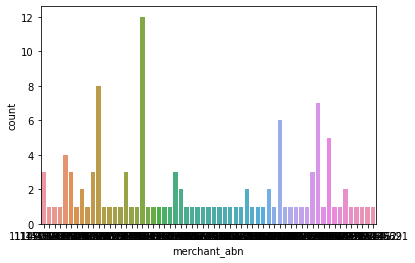

In [31]:
sns.countplot(x=merchant_fraud_prob['merchant_abn'])

In [77]:
merchant_fraud_total = transactions.merge(merchant_fraud_prob, how='inner', on=['merchant_abn', 'order_datetime'])
merchant_fraud_total

,user_id,merchant_abn,dollar_value,order_id,order_datetime,merchant_name,tags,sector_tags,revenue_band,take_rate,...,postcode,gender,comp_Yr_12_eq_percent,comp_Yr_12_eq_percent_M,comp_Yr_12_eq_percent_F,house_repay_to_income,Median_age_persons,Median_tot_prsnl_inc_weekly,Median_mortgage_repay_monthly,fraud_probability
0,14938,39649557865,209.127810,4d78cd01-4bab-494f-97cf-f7443faa348b,2021-11-26,Arcu Morbi Institute,"([artist supply and craft shops], [c], [take r...",artist supply and craft shops,c,1.47,...,2625,Undisclosed,0.507500,0.523810,0.476190,0.368317,37.0,1031.0,2659.0,28.690204
1,15222,39649557865,290.849798,b2c48e3a-a2b3-45fa-9331-435dd6985781,2021-11-26,Arcu Morbi Institute,"([artist supply and craft shops], [c], [take r...",artist supply and craft shops,c,1.47,...,3610,Female,0.257500,0.203463,0.325926,0.246812,49.0,587.0,1200.0,28.690204
2,352,39649557865,318.296213,b3c437ea-af68-4971-b2f9-3d37d11db61a,2021-11-26,Arcu Morbi Institute,"([artist supply and craft shops], [c], [take r...",artist supply and craft shops,c,1.47,...,2875,Female,0.290524,0.242280,0.335065,0.155172,50.0,593.0,780.0,28.690204
3,532,39649557865,59.014818,3827bfc9-c9da-4fc3-8b5b-0292b5b5858f,2021-11-26,Arcu Morbi Institute,"([artist supply and craft shops], [c], [take r...",artist supply and craft shops,c,1.47,...,2624,Female,0.549383,0.546392,0.557377,0.000000,31.0,916.0,0.0,28.690204
4,824,39649557865,104.004645,5e87947a-c000-49b6-82e3-435a202c6525,2021-11-26,Arcu Morbi Institute,"([artist supply and craft shops], [c], [take r...",artist supply and craft shops,c,1.47,...,7302,Male,0.256703,0.213496,0.297521,0.225773,40.0,705.0,1220.0,28.690204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,230,11149063370,47346.113374,6c3eb0dc-1235-4e1a-8664-8553579ae005,2021-08-28,Et Arcu Limited,"([art dealers and galleries], [b], [take rate:...",art dealers and galleries,b,4.84,...,2791,Male,0.313665,0.237179,0.371257,0.263033,53.0,742.0,1549.0,56.437613
3806,5965,11149063370,43965.463557,fdb38c15-1057-47cf-a4f3-6716ad06983b,2021-11-14,Et Arcu Limited,"([art dealers and galleries], [b], [take rate:...",art dealers and galleries,b,4.84,...,6409,Female,0.349741,0.313364,0.383721,0.115487,46.0,701.0,563.0,52.407803
3807,17900,11149063370,42797.348359,b0bdd444-223a-4b4f-98f3-7e2bba125691,2022-02-25,Et Arcu Limited,"([art dealers and galleries], [b], [take rate:...",art dealers and galleries,b,4.84,...,2805,Female,0.237745,0.205882,0.225962,0.239377,47.0,567.0,1029.0,51.015384
3808,22239,67264251405,51876.637564,09206be9-492c-414c-938d-a4814331e047,2021-10-19,Elit Dictum Eu Foundation,"((art dealers and galleries), (a), (take rate:...",art dealers and galleries,a,6.40,...,3813,Male,0.365524,0.301455,0.438017,0.214809,43.0,776.0,1965.0,18.210891


In [78]:
list(merchant_fraud_total.columns)

['user_id',
 'merchant_abn',
 'dollar_value',
 'order_id',
 'order_datetime',
 'merchant_name',
 'tags',
 'sector_tags',
 'revenue_band',
 'take_rate',
 'consumer_name',
 'state',
 'postcode',
 'gender',
 'comp_Yr_12_eq_percent',
 'comp_Yr_12_eq_percent_M',
 'comp_Yr_12_eq_percent_F',
 'house_repay_to_income',
 'Median_age_persons',
 'Median_tot_prsnl_inc_weekly',
 'Median_mortgage_repay_monthly',
 'fraud_probability']

Since we are dealing fraud transactions in merchants, we will only select the relevant columns. 
We will be selecting:
- merchant_abn
- order_datetime
- fraud_probability
- dollar_value
- sector_tags
- revenue_band
- consumer_name

In [79]:
merchant_fraud_total = merchant_fraud_total[['merchant_abn','consumer_name', 'order_datetime', 'fraud_probability', 'dollar_value', 'sector_tags', 'revenue_band']]

In [80]:
merchant_fraud_total

,merchant_abn,consumer_name,order_datetime,fraud_probability,dollar_value,sector_tags,revenue_band
0,39649557865,Jasmine Ford,2021-11-26,28.690204,209.127810,artist supply and craft shops,c
1,39649557865,Jennifer Brown,2021-11-26,28.690204,290.849798,artist supply and craft shops,c
2,39649557865,April Clark,2021-11-26,28.690204,318.296213,artist supply and craft shops,c
3,39649557865,Whitney Thompson,2021-11-26,28.690204,59.014818,artist supply and craft shops,c
4,39649557865,Peter Banks,2021-11-26,28.690204,104.004645,artist supply and craft shops,c
...,...,...,...,...,...,...,...
3805,11149063370,Fernando Reed,2021-08-28,56.437613,47346.113374,art dealers and galleries,b
3806,11149063370,Abigail Pham,2021-11-14,52.407803,43965.463557,art dealers and galleries,b
3807,11149063370,Angela Fuentes,2022-02-25,51.015384,42797.348359,art dealers and galleries,b
3808,67264251405,George Mendoza,2021-10-19,18.210891,51876.637564,art dealers and galleries,a


In [101]:
merch_grouped = merchant_fraud_total[['merchant_abn', 'order_datetime', 'fraud_probability']]
merch_distinct_grouped = merch_grouped.drop_duplicates()

<AxesSubplot:xlabel='dollar_value', ylabel='fraud_probability'>

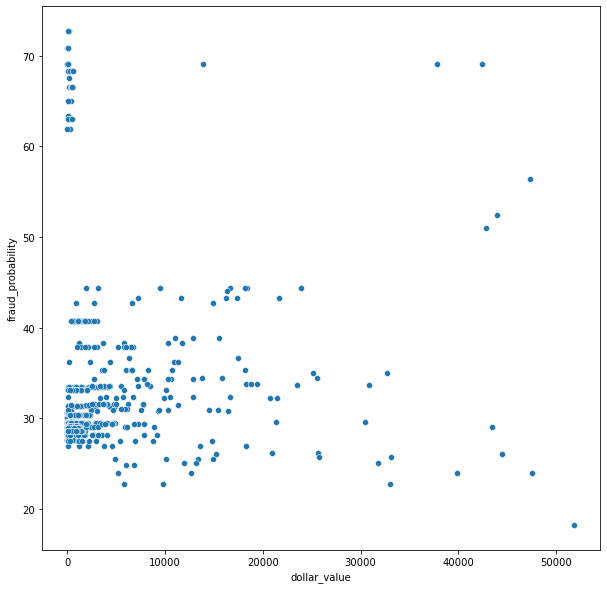

In [81]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=merchant_fraud_total, x='dollar_value', y='fraud_probability')

Looking at the scatterplot, we see that most frauds would occur below $5,000. To gain more details, we will look at the counts. With regards to the relationship between fraud probability and dollar value, we do not see much of a relationship. Most fraud probabilities were below 50\% with some exceptions at the top left which should be investigated further. 

In [69]:
merchant_fraud_total[merchant_fraud_total['dollar_value'] < 500]

,merchant_abn,order_datetime,fraud_probability,dollar_value,sector_tags,revenue_band
0,39649557865,2021-11-26,28.690204,209.127810,artist supply and craft shops,c
1,39649557865,2021-11-26,28.690204,290.849798,artist supply and craft shops,c
2,39649557865,2021-11-26,28.690204,318.296213,artist supply and craft shops,c
3,39649557865,2021-11-26,28.690204,59.014818,artist supply and craft shops,c
4,39649557865,2021-11-26,28.690204,104.004645,artist supply and craft shops,c
...,...,...,...,...,...,...
3750,93292821052,2021-11-29,66.587257,498.588483,"furniture, home furnishings and equipment shop...",c
3782,22606727520,2021-11-27,62.992787,253.568945,"books, periodicals, and newspapers",b
3783,22606727520,2021-11-27,62.992787,96.080164,"books, periodicals, and newspapers",b
3784,22606727520,2021-11-27,62.992787,71.822094,"books, periodicals, and newspapers",b


We see that most of the dollar values were below $500 which represented 82.15\% of the fraud data. 

(0.0, 1000.0)

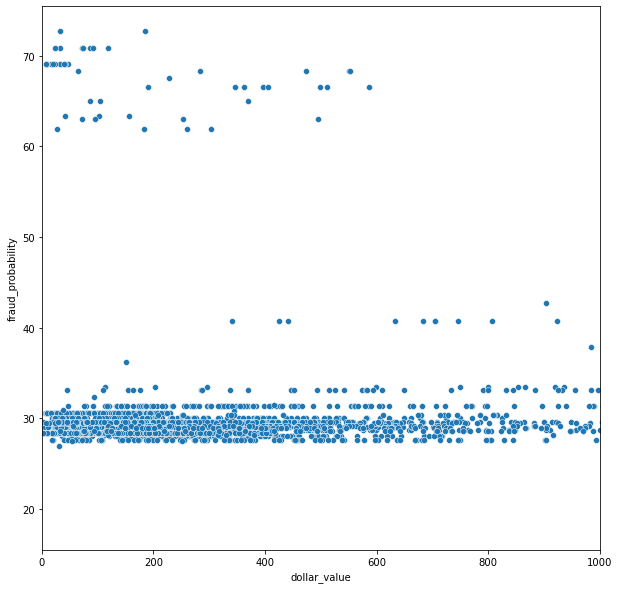

In [89]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=merchant_fraud_total, x='dollar_value', y='fraud_probability')
plt.xlim((0,1000))

Zooming in, we still do not see a clear relationship between the dollar values and fraud probability. 

(0.0, 1000.0)

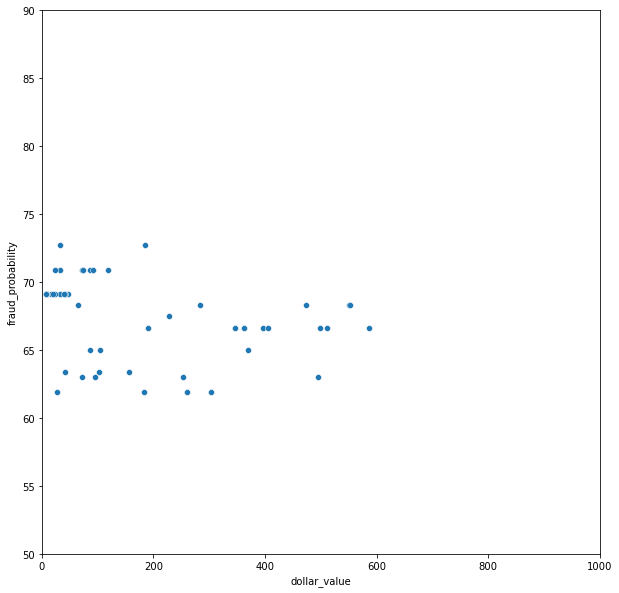

In [75]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=merchant_fraud_total, x='dollar_value', y='fraud_probability')
plt.ylim((50,90))
plt.xlim((0,1000))

This cluster has fraud rate of over 60% which is high. We will investigate further to see if it belongs to a specific merchant or consumer

In [83]:
cluster = merchant_fraud_total[merchant_fraud_total['fraud_probability']>60]

In [84]:
cluster

,merchant_abn,consumer_name,order_datetime,fraud_probability,dollar_value,sector_tags,revenue_band
3680,11470993597,Ashley Noble,2021-09-28,63.377344,155.409832,"watch, clock, and jewelry repair shops",d
3681,11470993597,Crystal Sanders,2021-09-28,63.377344,40.717833,"watch, clock, and jewelry repair shops",d
3682,11470993597,Kathleen King,2021-09-28,63.377344,101.825179,"watch, clock, and jewelry repair shops",d
3683,78187460332,Corey Booth,2021-12-19,65.005764,85.547328,"florists supplies, nursery stock, and flowers",a
3684,78187460332,Dustin Lewis,2021-12-19,65.005764,368.935407,"florists supplies, nursery stock, and flowers",a
3685,78187460332,Robert Jackson,2021-12-19,65.005764,104.827562,"florists supplies, nursery stock, and flowers",a
3686,76968105359,Courtney Moore,2021-12-09,68.278436,64.000166,health and beauty spas,a
3687,76968105359,Rebecca Matthews,2021-12-09,68.278436,473.436082,health and beauty spas,a
3688,76968105359,Hayley Reyes,2021-12-09,68.278436,283.371753,health and beauty spas,a
3689,76968105359,Kevin Collins,2021-12-09,68.278436,550.804161,health and beauty spas,a


In [86]:
cluster.nunique()

merchant_abn         11
consumer_name        51
order_datetime       10
fraud_probability    11
dollar_value         51
sector_tags           9
revenue_band          5
dtype: int64

In [87]:
cluster.count()

merchant_abn         51
consumer_name        51
order_datetime       51
fraud_probability    51
dollar_value         51
sector_tags          51
revenue_band         51
dtype: int64

We should go into more details on the 11 merchants especially where the counts were high for the transactions per merchant at the specific date. A possible explanation could be scalping bots in that case. 

Due to the limited fraud data, we are not able to check the fraud probabilities trend using time-series data

With regards to the consumer fraud data, it would not make sense if it was randomly drawn as we do not get an exact reference to how the transactions of consumers and if they were or were not fraud transactions. If a customer did purchase a few high purchases but only one of the transactions are given with fraud probability while the others are not given, we would think that the fraud was just a one time thing when actually all the high purchases were frauds which would be alarming. 

# checking for consumers

In [24]:
consumer_fraud_total = transactions.merge(consumer_fraud_prob, how='inner', on=['user_id', 'order_datetime'])
consumer_fraud_total

,user_id,merchant_abn,dollar_value,order_id,order_datetime,merchant_name,tags,sector_tags,revenue_band,take_rate,...,postcode,gender,comp_Yr_12_eq_percent,comp_Yr_12_eq_percent_M,comp_Yr_12_eq_percent_F,house_repay_to_income,Median_age_persons,Median_tot_prsnl_inc_weekly,Median_mortgage_repay_monthly,fraud_probability
0,9997,28000487688,305.560792,53ba619f-f979-4be4-96dc-6c51f440500e,2021-06-06,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,2423,Undisclosed,0.263876,0.241135,0.286248,0.288462,55.0,526.0,1300.0,12.257410
1,9266,28000487688,276.241346,dad49a54-6ae0-40fd-b8b3-74bf06d1c417,2021-08-02,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,4818,Undisclosed,0.391201,0.353596,0.429880,0.189378,32.0,978.0,1702.0,9.550889
2,9266,60829135130,4769.717820,9b58d356-4d50-4692-acf6-47219a321861,2021-08-02,Tellus Imperdiet Non Inc.,"([equipment, tool, furniture, and appliance re...","equipment, tool, furniture, and appliance rent...",d,1.18,...,4818,Undisclosed,0.391201,0.353596,0.429880,0.189378,32.0,978.0,1702.0,9.550889
3,9762,28000487688,110.018937,d569f9cd-c5dc-4e8a-8398-43a11f472876,2021-08-13,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,2176,Male,0.429151,0.430475,0.427669,0.300527,41.0,519.0,2167.0,20.433899
4,9762,19492220327,11528.218171,ee8e4c5d-5ffd-44d6-bdf5-e36b73a2b5a7,2021-08-13,Commodo Ipsum Industries,"([jewelry, watch, Clock, and silverware shops]...","jewelry, watch, clock, and silverware shops",b,4.93,...,2176,Male,0.429151,0.430475,0.427669,0.300527,41.0,519.0,2167.0,20.433899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64712,8812,86201937910,13054.406954,6223fd01-4d79-4bca-b14a-3143a75ce1f2,2021-12-16,Libero Et LLC,"[[jewelry, watch, clock, and siLverware shops]...","jewelry, watch, clock, and silverware shops",c,2.29,...,5412,Male,0.310663,0.294017,0.332784,0.222332,57.0,526.0,975.0,41.577735
64713,5046,50532670634,36416.003129,55e29eb7-ae0a-4a46-8565-d3ebd57a28cd,2022-01-23,Accumsan Laoreet Ipsum Company,"((antique shops - sales, repairs, and restorat...","antique shops - sales, repairs, and restoratio...",c,2.48,...,2400,Female,0.284714,0.249536,0.320863,0.188442,38.0,859.0,1300.0,76.987737
64714,5046,50532670634,36416.003129,55e29eb7-ae0a-4a46-8565-d3ebd57a28cd,2022-01-23,Accumsan Laoreet Ipsum Company,"((antique shops - sales, repairs, and restorat...","antique shops - sales, repairs, and restoratio...",c,2.48,...,2400,Female,0.284714,0.249536,0.320863,0.188442,38.0,859.0,1300.0,76.987737
64715,18207,64094501963,18365.761081,de9e56e8-5660-4587-9436-fc7ba9d74ce3,2022-02-06,Dictum Mi Corporation,"[(antique shops - sales, repairs, and restorat...","antique shops - sales, repairs, and restoratio...",c,3.00,...,3618,Female,0.278351,0.207283,0.341615,0.242644,47.0,557.0,1083.0,52.272413


In [25]:
consumer_fraud_total.nunique()

user_id                          18986
merchant_abn                      3160
dollar_value                     64431
order_id                         64580
order_datetime                     365
merchant_name                     3160
tags                              3116
sector_tags                         25
revenue_band                         5
take_rate                          599
consumer_name                    17004
state                                8
postcode                          3160
gender                               3
comp_Yr_12_eq_percent             2563
comp_Yr_12_eq_percent_M           2475
comp_Yr_12_eq_percent_F           2470
house_repay_to_income             2459
Median_age_persons                  49
Median_tot_prsnl_inc_weekly        829
Median_mortgage_repay_monthly      793
fraud_probability                30962
dtype: int64

As seen, we have reduced number of unique user_ids. This is due to the fact that we already removed those likely fraud accounts when we did outlier detection. We can further improve the dataset by seeing if we can learn anything from the fraud data with the remaining deemed suspicious transactions.

In [26]:
transactions

,user_id,merchant_abn,dollar_value,order_id,order_datetime,merchant_name,tags,sector_tags,revenue_band,take_rate,...,state,postcode,gender,comp_Yr_12_eq_percent,comp_Yr_12_eq_percent_M,comp_Yr_12_eq_percent_F,house_repay_to_income,Median_age_persons,Median_tot_prsnl_inc_weekly,Median_mortgage_repay_monthly
0,1,28000487688,133.226894,0c37b3f7-c7f1-48cb-bcc7-0a58e76608ea,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,WA,6935,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20864,28000487688,378.937918,f7eca4c5-474b-4ab2-ad61-6a8219b26d67,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,QLD,4113,Female,0.592941,0.600954,0.584624,0.218997,35.0,753.0,1730.0
2,22666,28000487688,108.164737,f93ae993-80eb-42d1-aaa6-3659e759ed87,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,QLD,4055,Female,0.531211,0.521567,0.540709,0.194157,38.0,1023.0,2100.0
3,23228,28000487688,329.178020,2a61a2f3-fbca-4011-87a3-6f45b4f1f7ed,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,NSW,2048,Male,0.674367,0.659671,0.688491,0.289064,36.0,1283.0,3000.0
4,5131,28000487688,425.750157,b0b4b456-e286-4b84-8313-f5c7210c7b4b,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t...","books, periodicals, and newspapers",b,4.24,...,WA,6904,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13614670,4308,55403018592,6667.835009,9a9aa6a5-3a74-4c5c-bd30-7b3a68576fa5,2022-06-23,Elit Limited,"((antique shops - sales, repairs, and restorat...","antique shops - sales, repairs, and restoratio...",b,4.84,...,TAS,7186,Male,0.260204,0.280374,0.298851,0.292969,58.0,505.0,1300.0
13614671,2327,46537010521,2429.912404,a6c6fe4a-9e8c-46d3-af7d-6e05aa404d6b,2022-04-23,Tempor Augue Ac Company,"[(jewelry, watch, clock, and silverware shops)...","jewelry, watch, clock, and silverware shops",c,2.18,...,WA,6969,Undisclosed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13614672,21431,46537010521,25661.545687,469c1f2d-4d40-4a1e-96b7-68db65f16c66,2022-10-05,Tempor Augue Ac Company,"[(jewelry, watch, clock, and silverware shops)...","jewelry, watch, clock, and silverware shops",c,2.18,...,WA,6336,Female,0.361516,0.345550,0.366667,0.066584,38.0,920.0,395.0
13614673,12663,47047735645,40896.257822,eb6dbb76-2682-45e3-a859-3a1f8b395f7f,2022-04-24,Aenean Gravida Institute,"((antique shops - sales, repairs, and restorat...","antique shops - sales, repairs, and restoratio...",c,1.54,...,VIC,3053,Male,0.782088,0.781346,0.782853,0.335161,27.0,658.0,1875.0


In [27]:
transactions[transactions['user_id']==21431]

,user_id,merchant_abn,dollar_value,order_id,order_datetime,merchant_name,tags,sector_tags,revenue_band,take_rate,...,state,postcode,gender,comp_Yr_12_eq_percent,comp_Yr_12_eq_percent_M,comp_Yr_12_eq_percent_F,house_repay_to_income,Median_age_persons,Median_tot_prsnl_inc_weekly,Median_mortgage_repay_monthly
45667,21431,83690644458,139.582324,c81139ab-5f3a-448e-a595-a4b295ea0aa9,2022-05-22,Id Erat Etiam Consulting,"[(gift, card, novelty, and souvenir shops), (b...","gift, card, novelty, and souvenir shops",b,3.15,...,WA,6336,Female,0.361516,0.34555,0.366667,0.066584,38.0,920.0,395.0
70194,21431,39649557865,1251.188528,e16edadd-05f3-46d9-b9ba-ad27332de38a,2022-04-16,Arcu Morbi Institute,"([artist supply and craft shops], [c], [take r...",artist supply and craft shops,c,1.47,...,WA,6336,Female,0.361516,0.34555,0.366667,0.066584,38.0,920.0,395.0
71284,21431,39649557865,405.551109,67601d36-129a-42c8-859b-75ea89b12a62,2022-05-14,Arcu Morbi Institute,"([artist supply and craft shops], [c], [take r...",artist supply and craft shops,c,1.47,...,WA,6336,Female,0.361516,0.34555,0.366667,0.066584,38.0,920.0,395.0
88215,21431,80779820715,21.667655,02ac262b-db36-4206-a282-640f15945752,2021-09-11,Euismod Enim LLC,"([watch, clock, and jewelry repair shops], [b]...","watch, clock, and jewelry repair shops",b,4.71,...,WA,6336,Female,0.361516,0.34555,0.366667,0.066584,38.0,920.0,395.0
90247,21431,80779820715,31.004130,a2ff0549-27d5-4e3f-848b-b0c976edd5c9,2021-10-16,Euismod Enim LLC,"([watch, clock, and jewelry repair shops], [b]...","watch, clock, and jewelry repair shops",b,4.71,...,WA,6336,Female,0.361516,0.34555,0.366667,0.066584,38.0,920.0,395.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13317630,21431,62029309613,62.190534,b35d4203-74da-40d4-a956-599085d34be3,2022-04-15,Cras Sed Leo Foundation,"[(Computer prograMming , data processing, and ...","computer programming , data processing, and in...",a,5.65,...,WA,6336,Female,0.361516,0.34555,0.366667,0.066584,38.0,920.0,395.0
13470267,21431,40305723628,262.192930,8f1c1016-7352-4316-9214-538465851339,2022-10-09,Quis Turpis Industries,"[[computer programming , data processing, and ...","computer programming , data processing, and in...",a,7.00,...,WA,6336,Female,0.361516,0.34555,0.366667,0.066584,38.0,920.0,395.0
13600381,21431,43590095676,3948.154146,c52811c5-bedc-48f3-aa9f-715e80c76aaa,2022-05-14,Fermentum Fermentum Corporation,"[[motor vehicle supplies and new parts], [b], ...",motor vehicle supplies and new parts,b,3.98,...,WA,6336,Female,0.361516,0.34555,0.366667,0.066584,38.0,920.0,395.0
13608918,21431,17435313552,1135.810283,1481536a-5451-47e4-9a86-cd8c67a50612,2022-09-18,Ac Fermentum Vel LLP,"[(stationery, office supplies and priNting and...","stationery, office supplies and printing and w...",c,2.48,...,WA,6336,Female,0.361516,0.34555,0.366667,0.066584,38.0,920.0,395.0


In [30]:
fraud_consumers= list(consumer_fraud_total['user_id'].unique())
fraud_consumers

[9997,
 9266,
 9762,
 553,
 21379,
 12362,
 10593,
 22366,
 2812,
 5796,
 9589,
 15292,
 18477,
 796,
 22187,
 21329,
 983,
 11978,
 15864,
 18708,
 10528,
 17798,
 1603,
 17211,
 18688,
 15462,
 6320,
 8244,
 10137,
 2566,
 19620,
 7658,
 4258,
 14671,
 2422,
 10952,
 19956,
 637,
 14360,
 21295,
 15234,
 1001,
 18848,
 17924,
 3360,
 7228,
 13604,
 12574,
 3770,
 20986,
 18659,
 2280,
 13281,
 17758,
 20599,
 154,
 16319,
 23866,
 20855,
 4607,
 16967,
 4110,
 1396,
 7523,
 12572,
 21578,
 7958,
 18109,
 11478,
 6526,
 11617,
 19326,
 6109,
 22499,
 22628,
 21639,
 15020,
 18262,
 11172,
 5282,
 6349,
 10097,
 19975,
 9249,
 10867,
 5974,
 17143,
 8351,
 2856,
 10451,
 18847,
 10722,
 22988,
 10371,
 1869,
 6153,
 22205,
 7059,
 17934,
 19254,
 15106,
 17704,
 20764,
 16872,
 18255,
 16291,
 5202,
 9773,
 20414,
 20664,
 475,
 18053,
 7952,
 7390,
 8146,
 11827,
 4055,
 17445,
 23542,
 14793,
 15107,
 18339,
 6308,
 24034,
 14423,
 15161,
 7585,
 23423,
 6905,
 8612,
 10326,
 13480,


In [42]:
# Now we sample randomly from the consumers
random.seed(42)
fraud_consumers_sample = random.choices(fraud_consumers, k=100)

In [46]:
# Now we will collate all transactions relating to those consumers and group by day per consumer
collated_transactions = transactions[transactions['user_id'].isin(fraud_consumers_sample)]
consumer_transactions_day = collated_transactions.groupby(['user_id', 'order_datetime']).agg( total_dollar=pd.NamedAgg(column='dollar_value', aggfunc="sum")).reset_index()
consumer_transactions_day


,user_id,order_datetime,total_dollar
0,159,2021-03-06,123.555422
1,159,2021-03-07,13.248973
2,159,2021-03-08,33.733631
3,159,2021-03-09,430.556636
4,159,2021-03-12,24.022601
...,...,...,...
35630,24062,2022-10-20,84.013352
35631,24062,2022-10-21,632.140438
35632,24062,2022-10-22,63.785759
35633,24062,2022-10-24,28.642792


<ipython-input-124-9fc360df013f>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


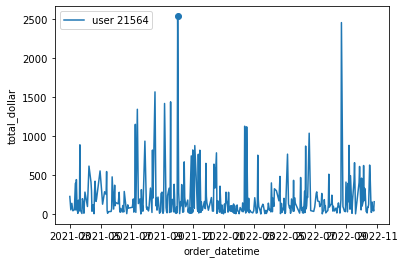

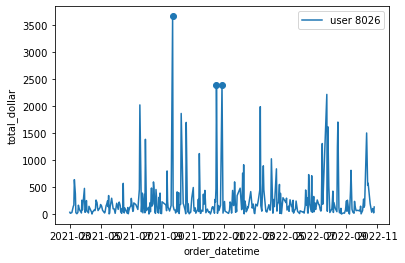

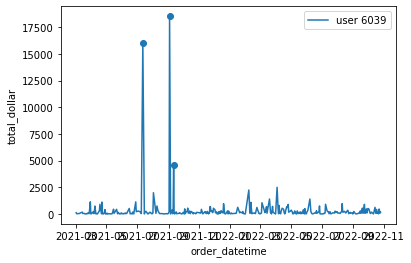

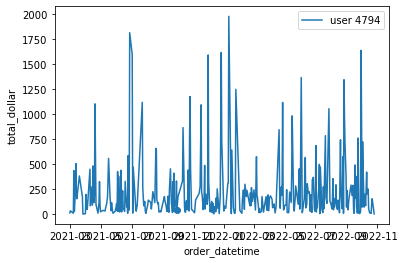

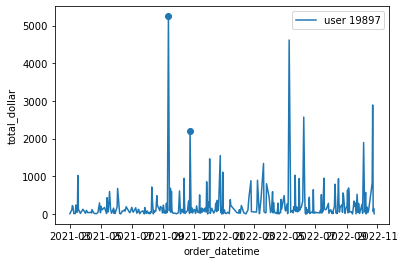

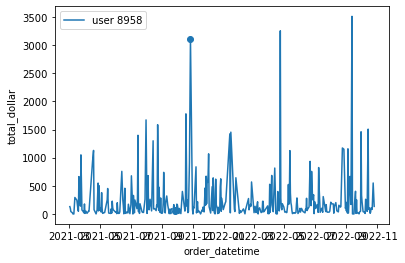

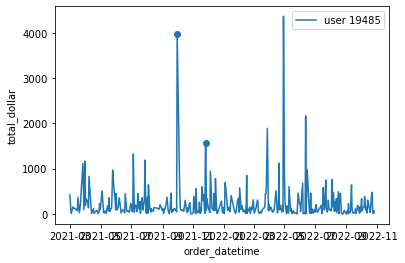

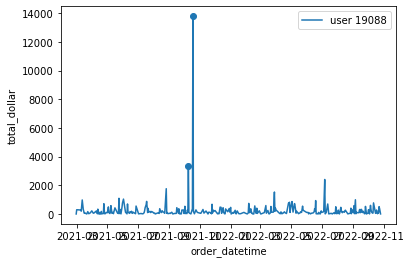

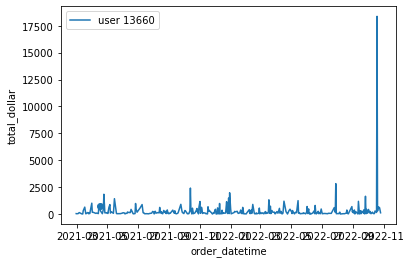

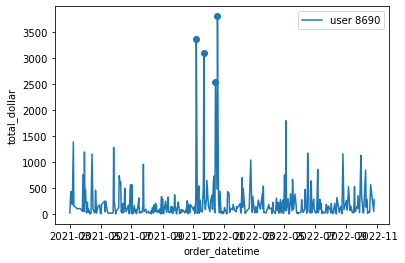

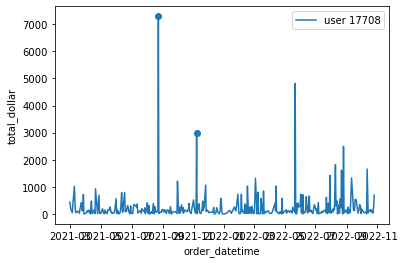

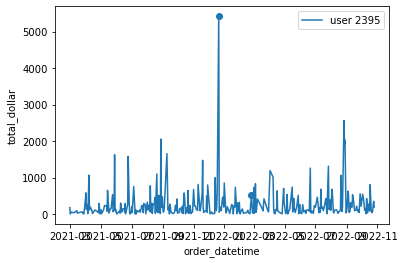

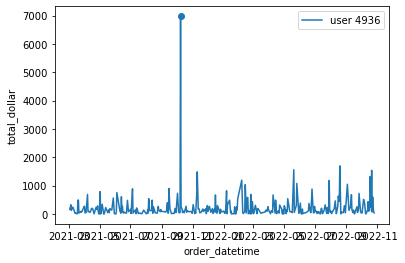

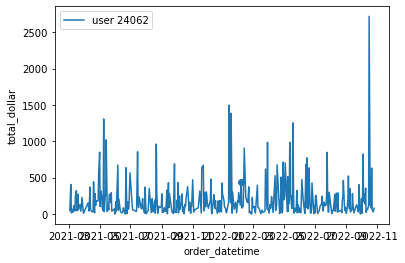

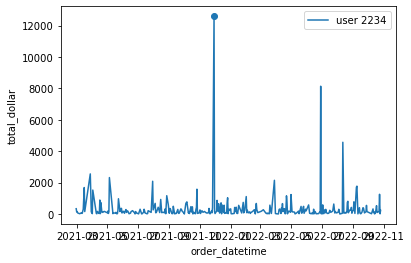

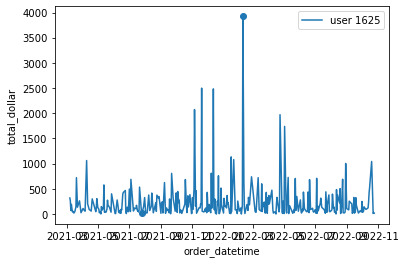

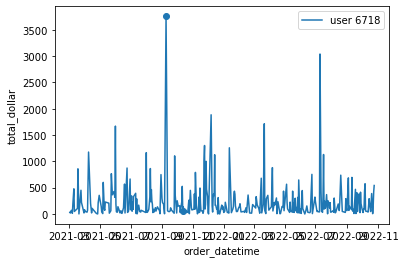

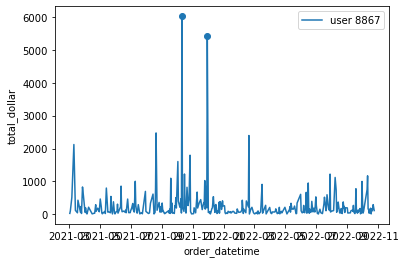

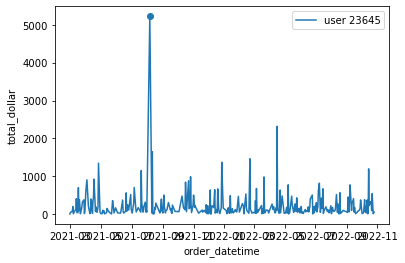

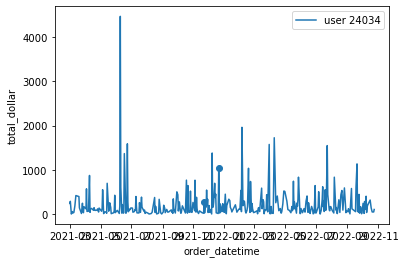

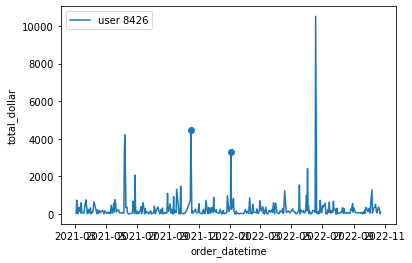

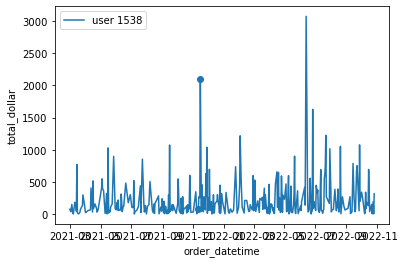

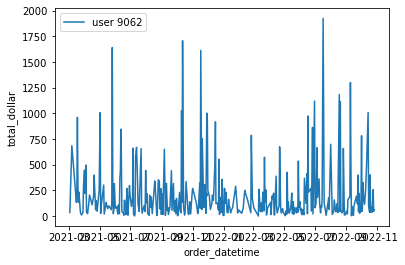

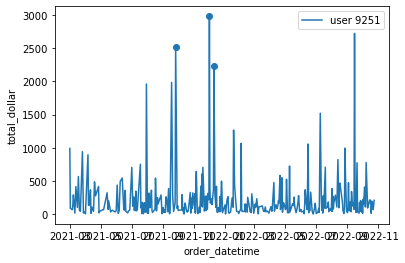

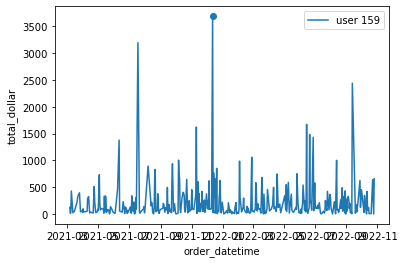

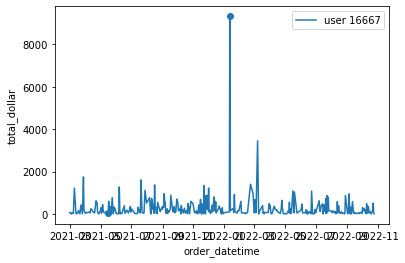

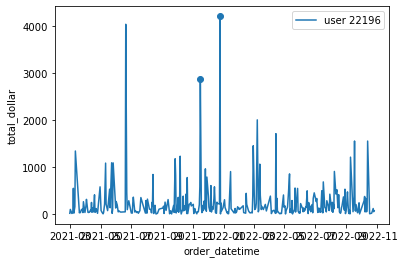

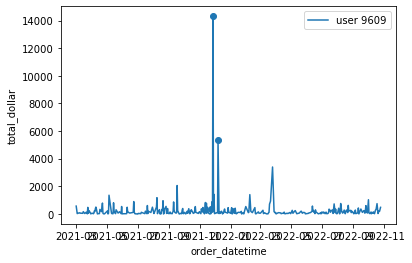

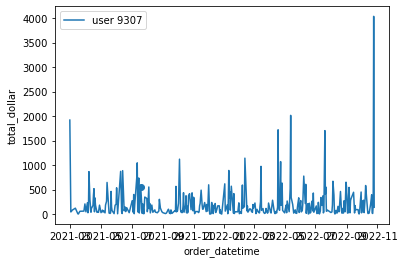

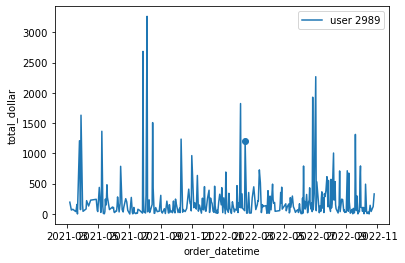

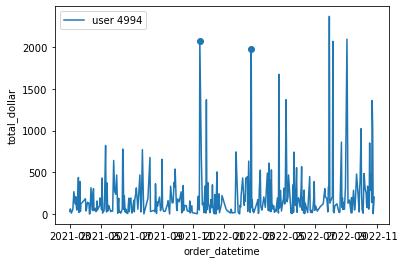

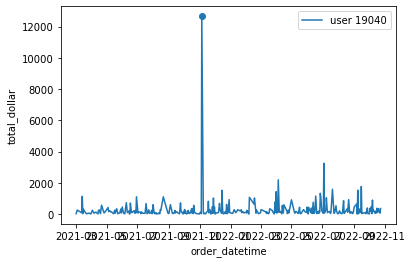

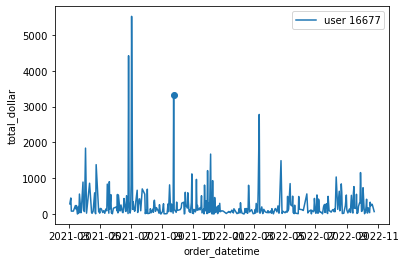

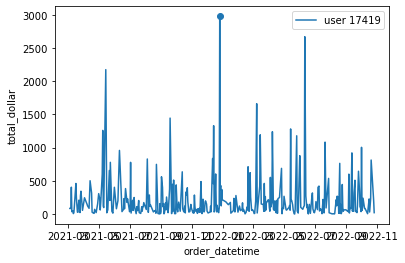

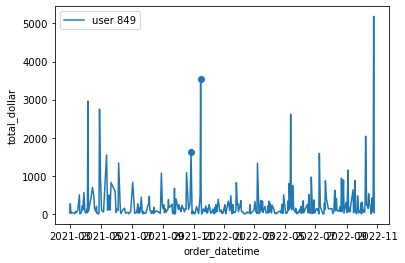

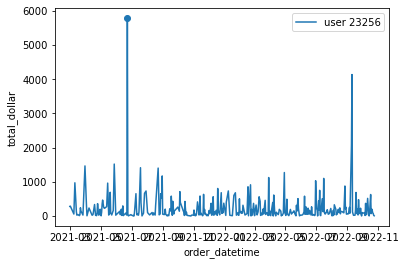

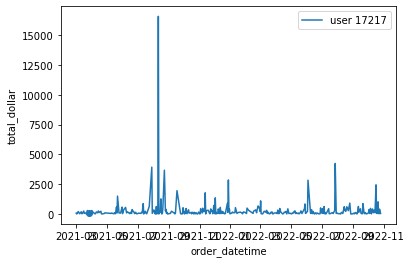

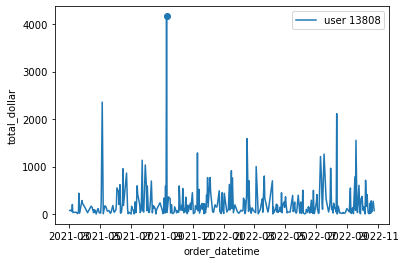

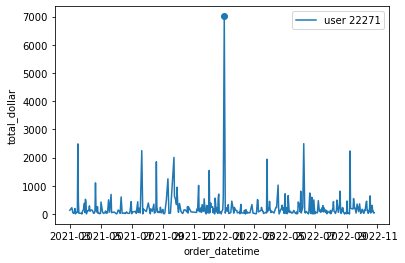

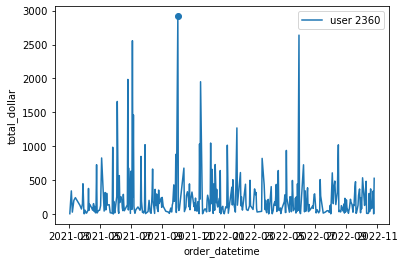

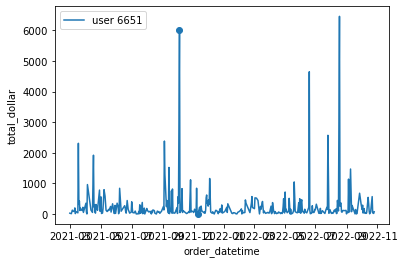

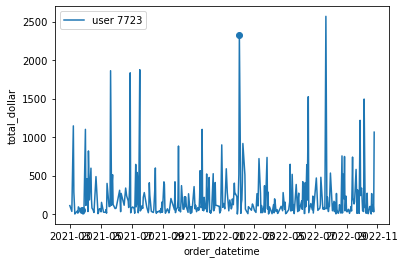

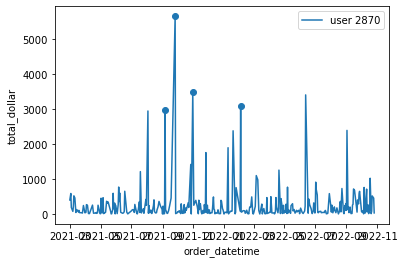

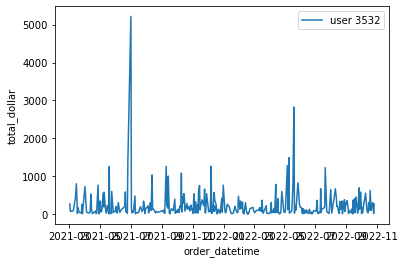

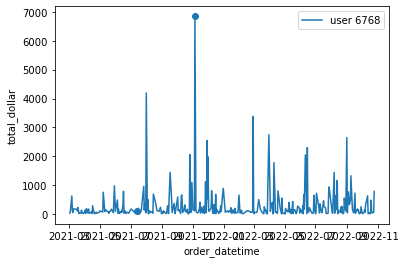

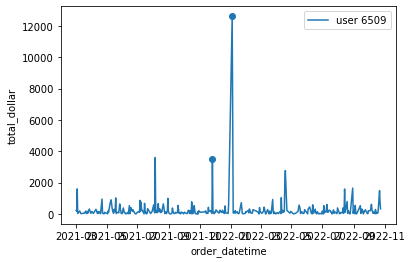

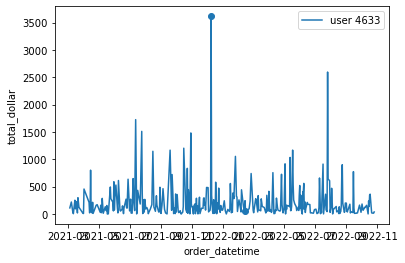

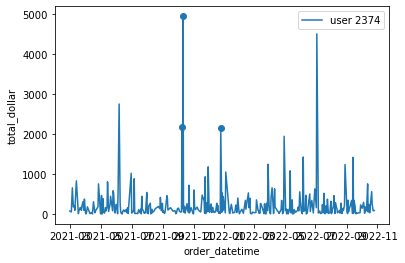

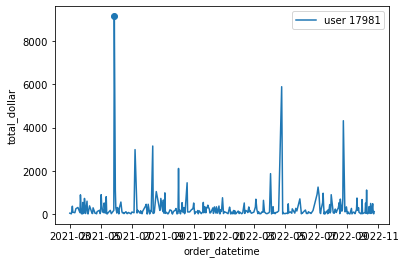

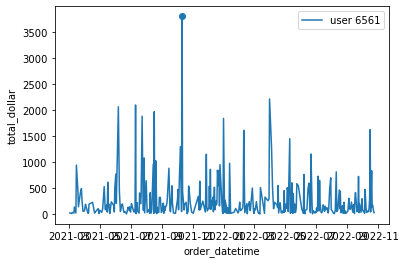

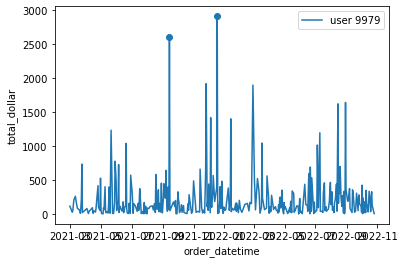

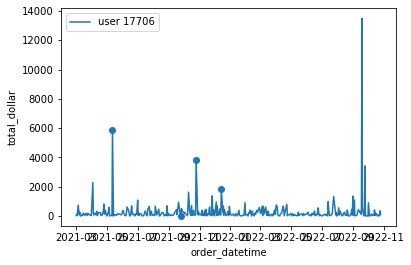

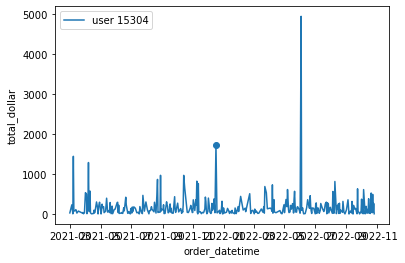

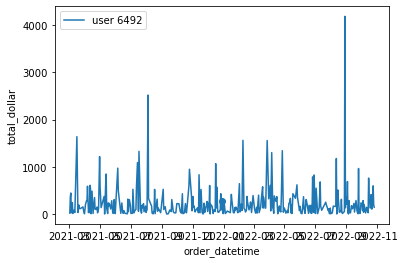

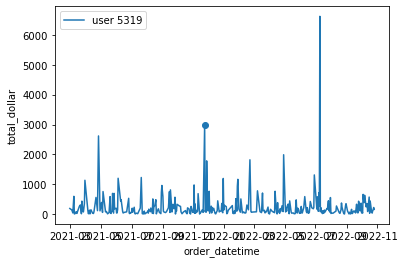

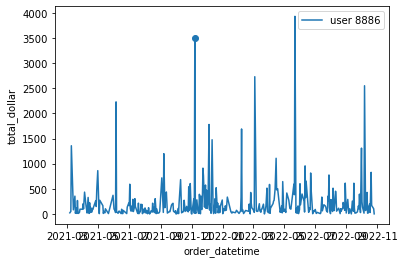

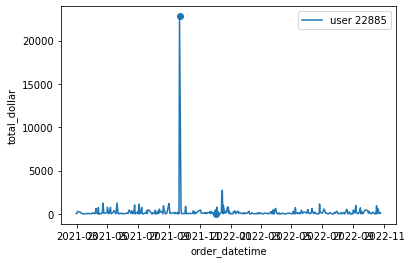

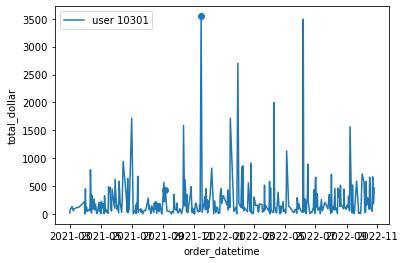

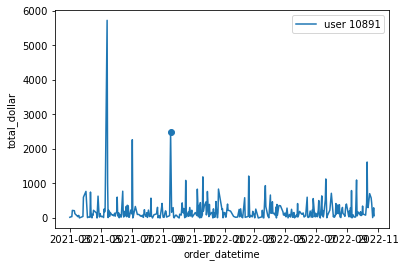

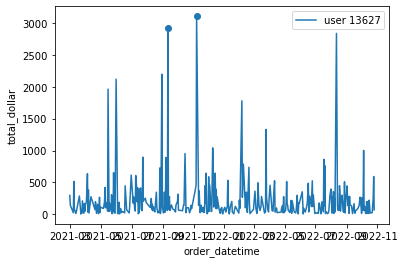

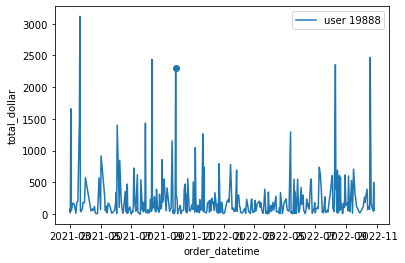

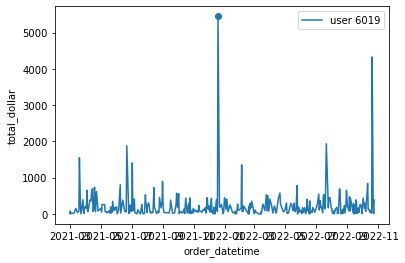

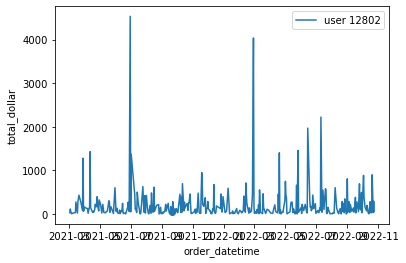

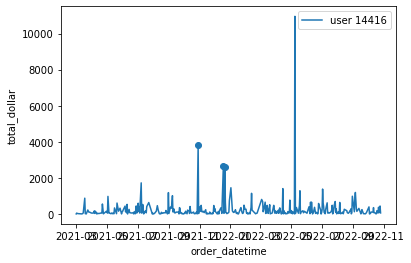

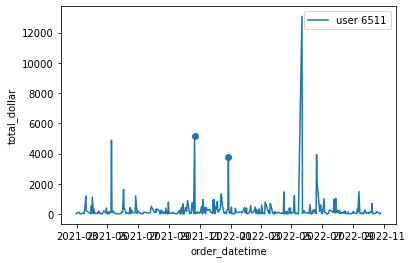

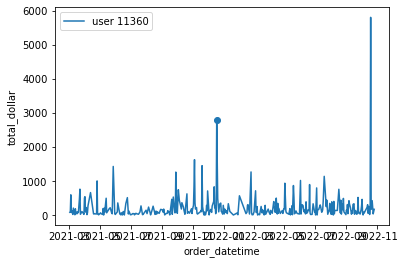

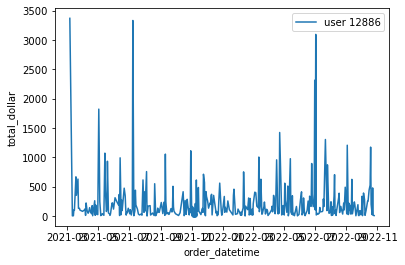

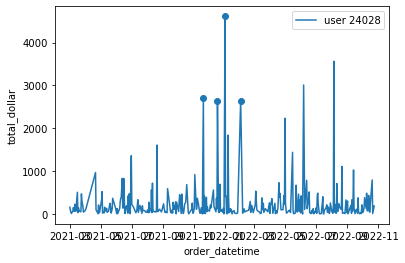

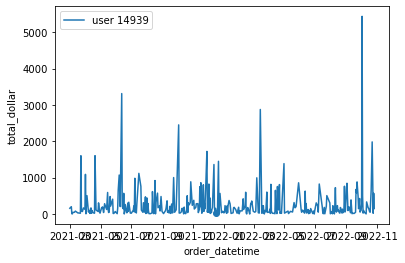

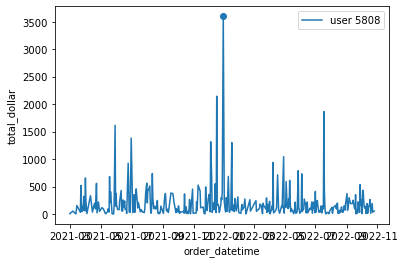

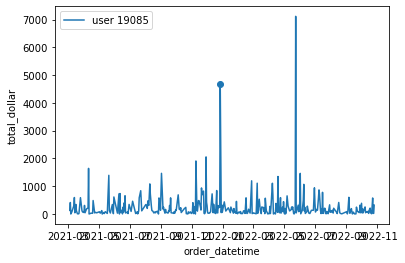

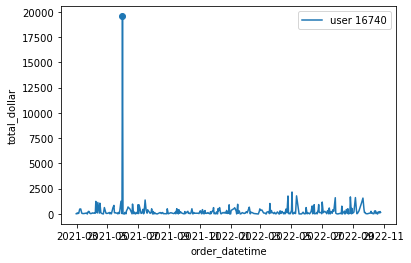

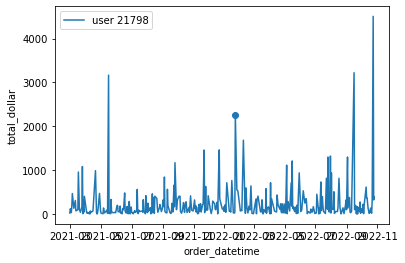

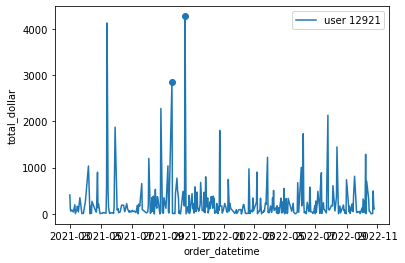

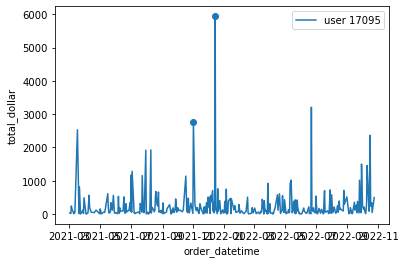

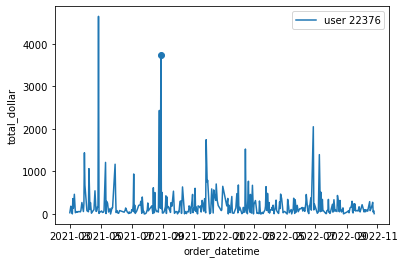

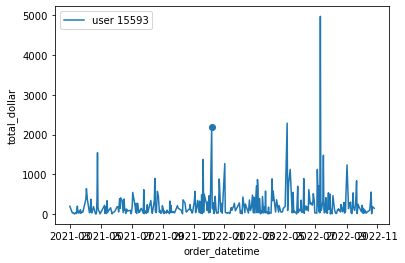

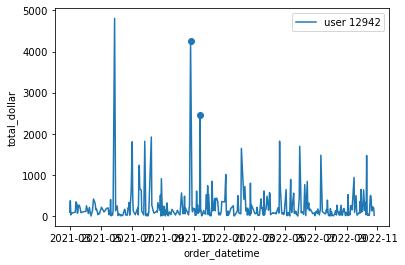

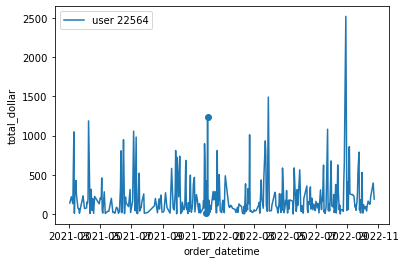

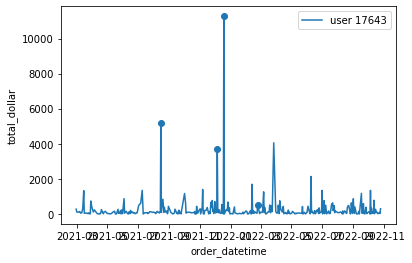

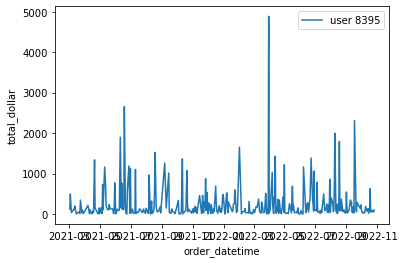

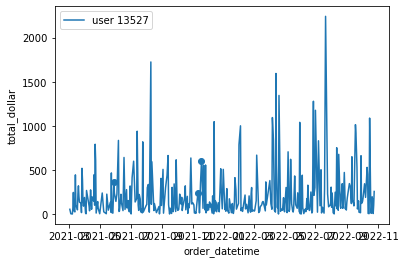

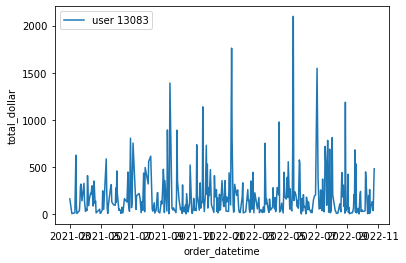

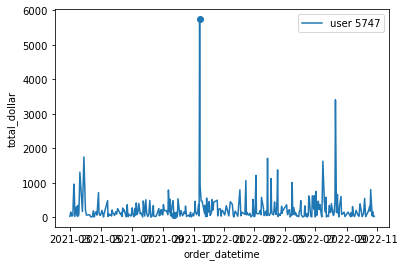

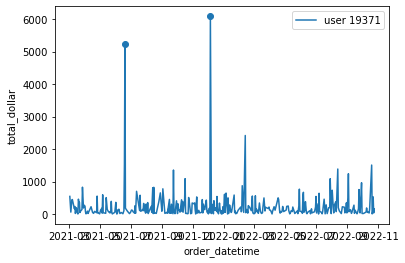

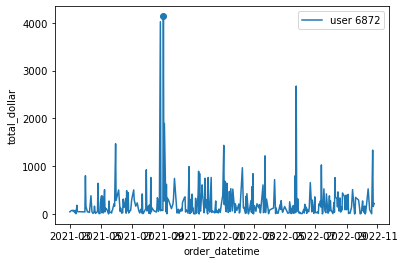

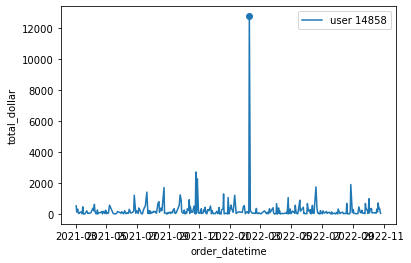

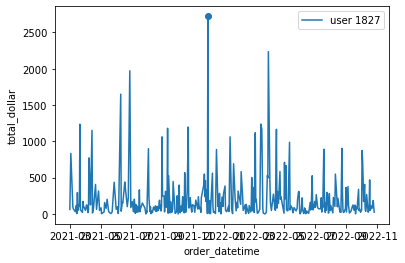

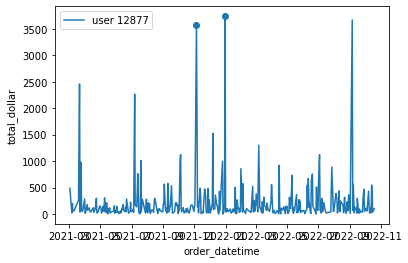

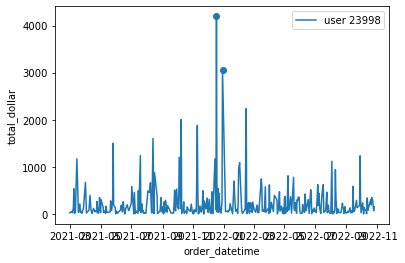

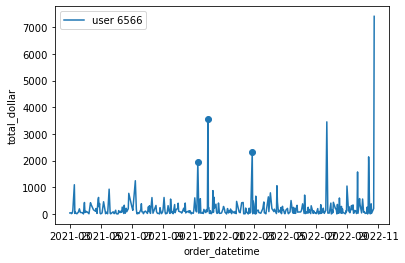

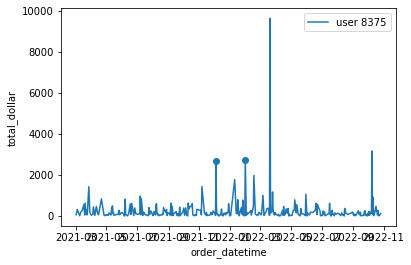

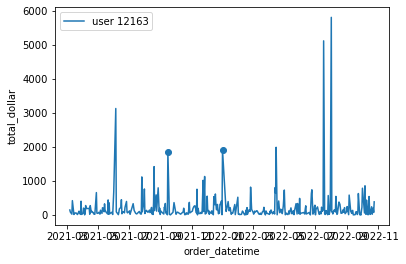

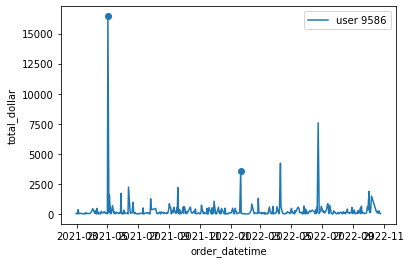

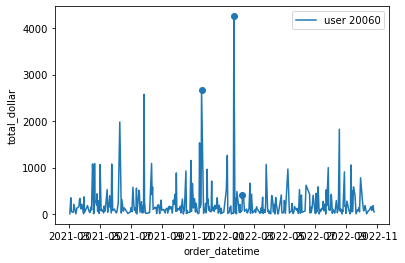

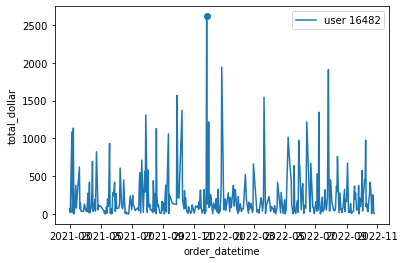

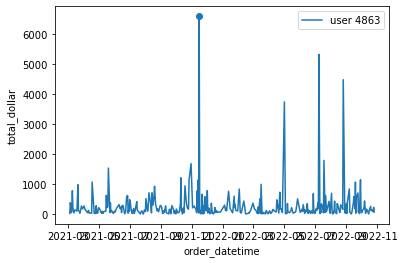

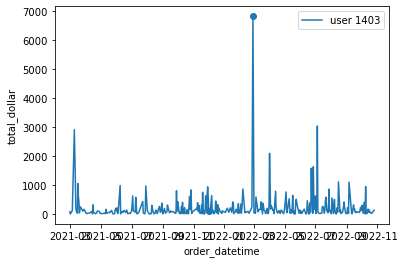

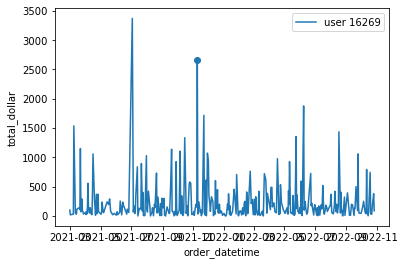

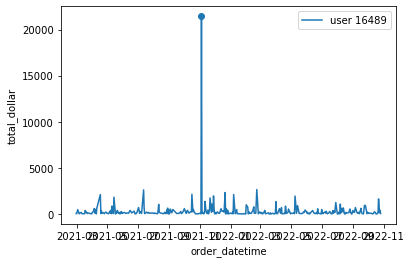

In [124]:
# We will see 100 plots of each consumers and see if the transaction day and total amount spent that day relate
for user in fraud_consumers_sample:
    
    total_transactions = consumer_transactions_day[consumer_transactions_day['user_id']==user].sort_values(by=['order_datetime'])
    fraud_dates = np.unique(consumer_fraud_total.loc[consumer_fraud_total['user_id']==user,'order_datetime'].values)
    matched_dates = total_transactions[total_transactions['order_datetime'].isin(fraud_dates)]
    
    
    fig, ax = plt.subplots()
    ax = sns.lineplot(data = total_transactions, x='order_datetime', y='total_dollar')
    ax.scatter(matched_dates['order_datetime'], matched_dates['total_dollar'], marker='o')
    
    ax.legend([f'user {user}'])
    
    
    


From the graphs, we can see that most of the suspected fraudulants transactions are due to consumers making a big purchase on a single day compared to the rest of his/her spendings on other days. Although it is not every case, we do see lots of similarities and we need to consider the fact that we already removed outliers. It would be best to come up with a simple model to see surprising purchases from a consumer and removing that whole day's worth of transactions as it could be due to fraud. Some disadvantages of these would be we are disregarding the assumption that consumers may have a big purchase in a case where they got their first paycheck or its a special day like their birthday.